# Grab and Run Yolov5 using PIP

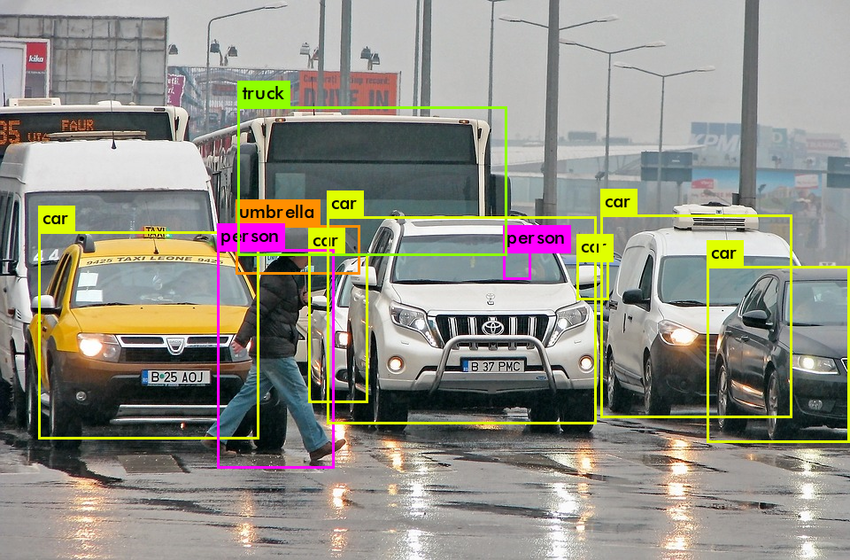

In [1]:
# download the model Weights, coco.names and data
!wget https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip && unzip tracking_course.zip

--2023-08-22 18:57:35--  https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip
Resolving thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)... 16.12.18.22, 3.5.226.172
Connecting to thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)|16.12.18.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632297503 (603M) [application/zip]
Saving to: ‘tracking_course.zip’

tracking_course.zip 100%[===================>] 603.01M  21.3MB/s    in 30s     

2023-08-22 18:58:05 (20.4 MB/s) - ‘tracking_course.zip’ saved [632297503/632297503]

Archive:  tracking_course.zip
   creating: tracking_course/
  inflating: __MACOSX/._tracking_course  
  inflating: tracking_course/coco.names  
  inflating: __MACOSX/tracking_course/._coco.names  
  inflating: tracking_course/.DS_Store  
  inflating: __MACOSX/tracking_course/._.DS_Store  
  inflating: trackin

In [7]:
# import neccessary libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import copy

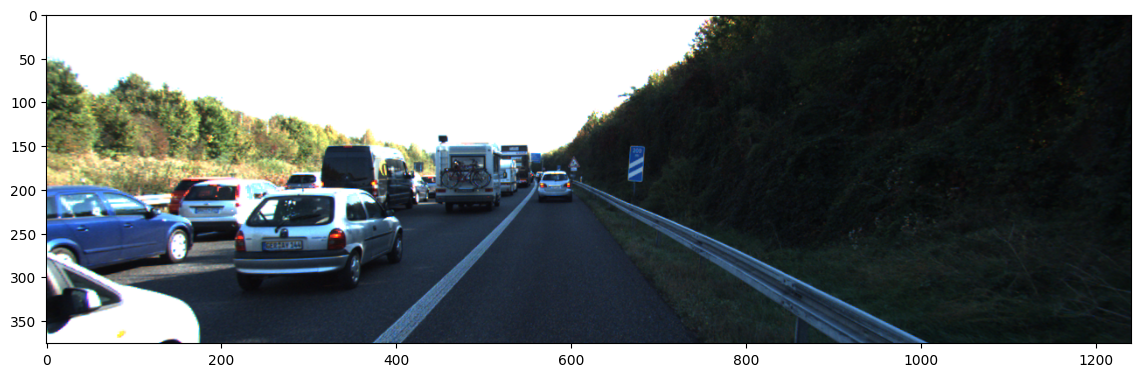

In [8]:
# Reading an Image using OpenCV and show using matplotlib
img = cv2.cvtColor(cv2.imread("tracking_course/data/0000000230.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,7))
plt.imshow(img)
plt.show()

In [14]:
# installing Yolov5 using pip
!pip install yolo5

  Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [12]:
# installing pillow
!pip install Pillow==7.1.2

In [15]:
# importing yolov5
import yolov5

# loading model
model = yolov5.load('/content/tracking_course/yolov5s.pt')

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")



In [16]:
help(model)

Help on AutoShape in module yolov5.models.common object:

class AutoShape(torch.nn.modules.module.Module)
 |  AutoShape(model, verbose=True)
 |  
 |  Method resolution order:
 |      AutoShape
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model, verbose=True)
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  forward(self, ims, size=640, augment=False, profile=False)
 |      Defines the computation performed at every call.
 |      
 |      Should be overridden by all subclasses.
 |      
 |      .. note::
 |          Although the recipe for forward pass needs to be defined within
 |          this function, one should call the :class:`Module` instance afterwards
 |          instead of this since the former takes care of running the
 |          registered hooks while the latter silently ignores them.
 |  
 |  -----------------------------------------------------------------

In [17]:
# defining model confidence
model.conf = 0.5
# defining model IoU Confidence
model.iou = 0.4
# making a copy of image
image = copy.deepcopy(img)
# inferencing and extracting the results
results = model(image)

In [18]:
# extracking predictions
predictions = results.pred[0]
# extracting bounding boxes, scores and classes from predictions
boxes = predictions[:, :4].tolist()
scores = predictions[:,4].tolist()
categories = predictions[:,5].tolist()
# printing bounding boxes, scores and classes from predictions
print(boxes)
print(scores)
print(categories)

[[0.0, 192.1587677001953, 168.08251953125, 293.1620178222656], [559.3020629882812, 178.25599670410156, 602.397216796875, 212.79237365722656], [212.60202026367188, 195.2044219970703, 408.87469482421875, 318.0950012207031], [133.67552185058594, 185.53921508789062, 265.6102600097656, 260.9315185546875], [312.91229248046875, 149.44288635253906, 422.00927734375, 230.48297119140625], [442.70648193359375, 143.23355102539062, 541.7738647460938, 225.81834411621094], [0.0, 258.37310791015625, 177.96131896972656, 375.3357849121094]]
[0.8590245246887207, 0.8010264039039612, 0.78788822889328, 0.7515301704406738, 0.6672024726867676, 0.6477403044700623, 0.5615158081054688]
[2.0, 2.0, 2.0, 2.0, 7.0, 7.0, 2.0]


In [19]:
# converting all bboxes and categories to integer data
boxes_int = [[int(v) for v in box] for box in boxes]
categories_int = [int(c) for c in categories]

In [20]:
def id_to_color(idx):
    """
    Random function to convert an id to a color
    Do what you want here but keep numbers below 255
    """
    blue = idx*5 % 256
    green = idx*12 %256
    red = idx*23 %256
    return (red, green, blue)

In [21]:
# defining a visualization function to show the results of Yolov5
def draw_boxes_v5(image, boxes, categories, mot_mode=False):
    h, w, _ = image.shape
    for i, box in enumerate(boxes):
        label = classes[int(categories[i])]
        color = id_to_color(i*10) if mot_mode==True else (255,0,60)
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, thickness=3)
        cv2.putText(image, str(label), (int(box[0]), int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), thickness=3)
    return image

In [22]:
# read classes
classesFile = "/content/tracking_course/coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

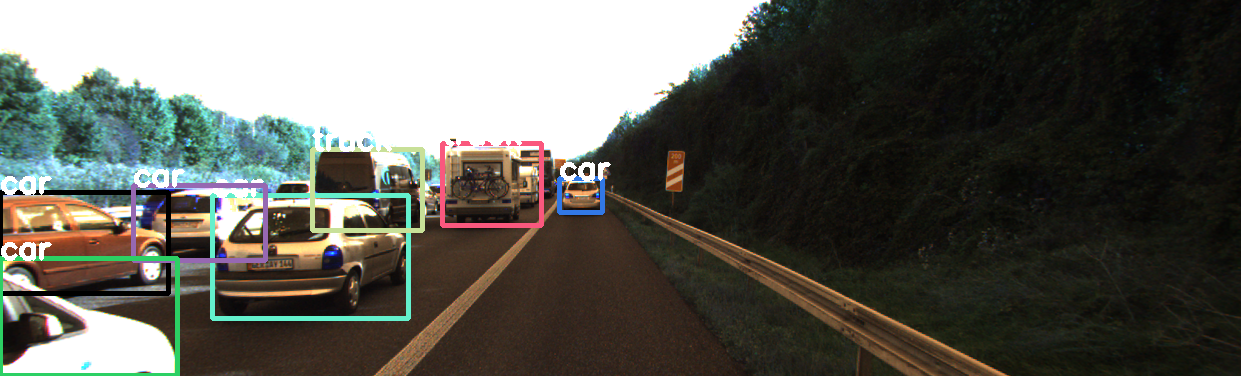

In [23]:
# showing results using opencv
from google.colab.patches import cv2_imshow
plt.figure(figsize=(14,7))
Image_2 = draw_boxes_v5(img, boxes, categories,mot_mode=True)
cv2_imshow(Image_2)

In [25]:
# defining inference function
def inference(img):
    results = model(img)
    predictions = results.pred[0]
    boxes = predictions[:, :4].tolist()
    boxes_int = [[int(v) for v in box] for box in boxes]
    scores = predictions[:,4].tolist()
    categories = predictions[:,5].tolist()
    categories_int = [int(c) for c in categories]
    img_out = draw_boxes_v5(img, boxes_int, categories_int, mot_mode=False)
    return img_out, boxes_int, categories_int, scores

In [26]:
# run yolov5 model on a video
import glob
from tqdm import tqdm

video_images = sorted(glob.glob("tracking_course/data/*.png"))
result_video = []

for img in tqdm(video_images):
    img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    img_out, _, _, _ = inference(img)
    result_video.append(img_out)

100%|██████████| 837/837 [03:29<00:00,  4.00it/s]


In [27]:
# recording a video
out = cv2.VideoWriter('out_yolo.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, (img.shape[1],img.shape[0]))

for img in result_video:
  out.write(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
out.release()